本示例为K-Means算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 1. 生成样本

In [2]:
def generate_samples():
    X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                      cluster_std=[0.4, 0.2, 0.2, 0.2],
                      random_state=9)
    return X, y

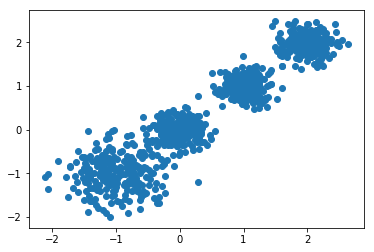

In [4]:
X, y = generate_samples()
plt.scatter(X[:,0], X[:,1], marker='o')
plt.show()   

#### 2. 聚类效果

#### 2.1 K-Means算法

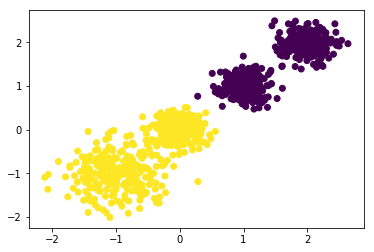

In [11]:
from sklearn.cluster import KMeans
estimator = KMeans(n_clusters=2,random_state=42)
y_predict = estimator.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_predict)
plt.show()

In [14]:
estimator.inertia_    # 各簇的距离平方和的和

628.3399162393426

In [15]:
from sklearn.metrics import calinski_harabaz_score    # Calinski-Harabasz分数值
calinski_harabaz_score(X, y_predict)

3116.1706763322227

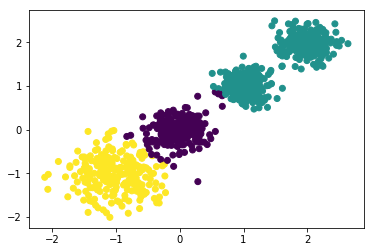

In [16]:
# 三个cluster， 效果变差
y_predict2 = KMeans(n_clusters=3,random_state=42).fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_predict2)
plt.show()

In [17]:
calinski_harabaz_score(X, y_predict2)

2931.625030199556

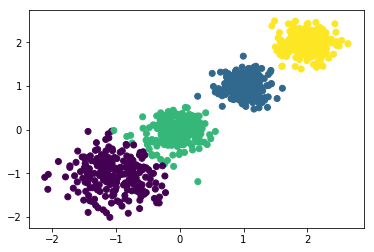

In [18]:
# 四个cluster，效果最好
y_predict3 = KMeans(n_clusters=4,random_state=42).fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_predict3)
plt.show()

In [19]:
calinski_harabaz_score(X, y_predict3)

5924.050613480169

##### 2.2 Mini-batch 算法

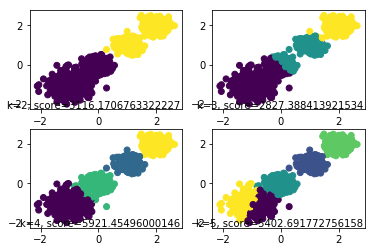

In [36]:
from sklearn.cluster import MiniBatchKMeans
for index, k in enumerate([2,3,4,5]):
    plt.subplot(2,2,index+1)
    y_pred = MiniBatchKMeans(n_clusters=k, batch_size=200, random_state=9).fit_predict(X)
    score = calinski_harabaz_score(X, y_pred)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.text(0.99, 0.01, ('k={}, score={}'.format(k, score)), transform=plt.gca().transAxes, size=10, horizontalalignment='right')
plt.show()    